## Import Libraries

In [2]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import leagueleaders

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame
from sklearn import linear_model
import seaborn as sn

In [9]:
data = leagueleaders.LeagueLeaders()
df = data.league_leaders.get_data_frame()

## Correlation Matrix and Heatmap

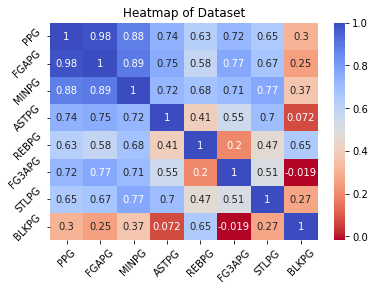

<Figure size 1800x1152 with 0 Axes>

In [10]:
#Calculate stats per game
ppg = df.PTS/df.GP 
fgapg = df.FGA/df.GP
minpg = df.MIN/df.GP
astpg = df.AST/df.GP 
rebpg = df.REB/df.GP 
fgtapg = df.FG3A/df.GP 
stlpg = df.STL/df.GP 
blkpg = df.BLK/df.GP 

#Add to dateframe
df['PPG'] = ppg
df['MINPG'] = minpg
df['FGAPG'] = fgapg
df['ASTPG'] = astpg
df['REBPG'] = rebpg
df['FG3APG'] = fgtapg
df['STLPG'] = stlpg
df['BLKPG'] = blkpg


#Separate dataframe for averages
corrDf = DataFrame(df,columns=['PPG','FGAPG', 'MINPG','ASTPG','REBPG','FG3APG','STLPG','BLKPG'])

#Create correlation matrix
corrMatrix = corrDf.corr()
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm_r')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.title('Heatmap of Dataset')
plt.figure(figsize=(25, 16))
plt.show()

### Very strong correlation between Points per Game (PPG) and Field Goal Attempts per Game (FGAPG)
### Strong correlation between Points per Game and Assists per Game (ASTPG)
### Good correlation between Steals per Game (STLPG) and Assists per Game (ASTPG)
### Good correlation between Rebounds per Game (REBPG) and Blocks per Game (BLKPG) 

## Linear Regression

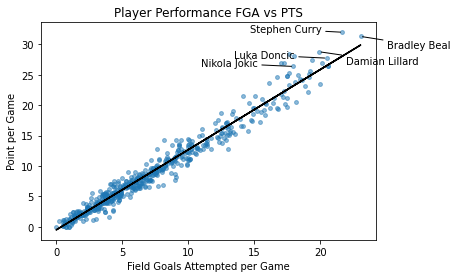

<Figure size 1800x1152 with 0 Axes>

In [8]:

#Calculate Field Goals Attempted per Game and Point per Game
x,y = df.FGA/df.GP, df.PTS/df.GP 

#Reshape array to 2D
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

model = linear_model.LinearRegression()
model.fit(x,y)

#Predicts Point per Game based on Field Goal attemps per game
predicted_y = model.predict(x)

#Plot Set-up
plt.scatter(x,y,s=15,alpha=.5)
plt.plot(x,predicted_y,color='black')

for i in range(0,5):
    #Stager player names
    if(i%2 == 0 ):
        plt.annotate(df.PLAYER[i],                       # This the name of the top scoring player. Refer to the .head() from earlier
                (x[i], y[i]),                       # This is the point we want to annotate.  
                (x[i]-7,y[i]),                    # These are coords for the text
                arrowprops=dict(arrowstyle='-'))
    else:
        plt.annotate(df.PLAYER[i],                       
                (x[i], y[i]),                         
                (x[i]+2,y[i]-2),                    
                arrowprops=dict(arrowstyle='-'))

plt.title('Player Performance FGA vs PTS')
plt.xlabel('Field Goals Attempted per Game')
plt.ylabel('Point per Game')
plt.figure(figsize=(25, 16))
plt.show()

### Top 5 players in the NBA looks like Beal and Curry are amongest the elite when it comes good field goal attempts
### While the MVP of the 2020-21 season, Jokic, looks to behind. 